In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#select some features to work with
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


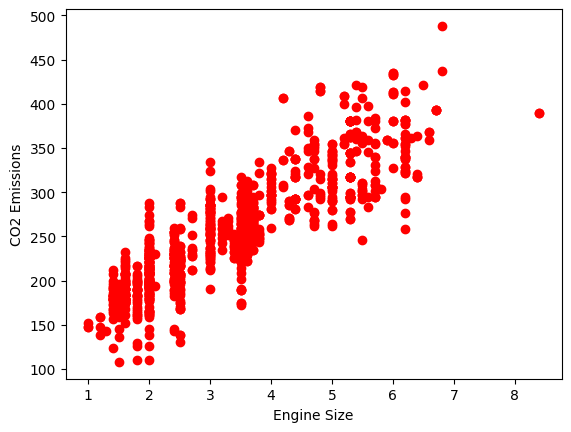

In [7]:
plt.scatter(cdf[['ENGINESIZE']], cdf[['CO2EMISSIONS']], color = 'Red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()  # in some environment without plt.show the garph will not be shown 


In [8]:
#creating test and train datasets 
msk = np.random.rand(len(cdf)) <.8
train = cdf[msk]
test = cdf[~msk]
# remember with this method ABOUT 80% of data are assigned to traing and ROUGHLY 20% for testing; number are not ecxatcly 80 and 20

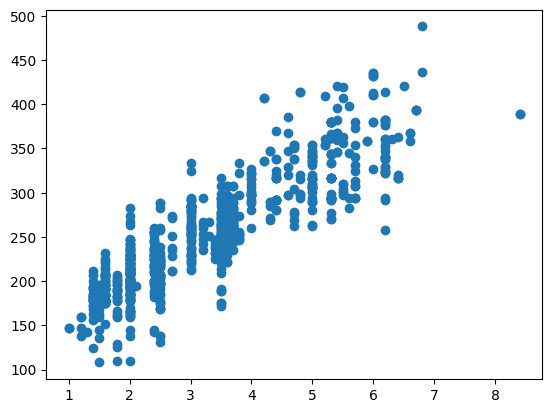

In [9]:
#Let's look at the linearity of test data for engine size 
plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']])

In [10]:
#now multiple linear regression
from sklearn import linear_model
#sklearn uses Ordinary Least Squares for regression 

In [11]:
regr = linear_model.LinearRegression()

In [12]:
regr.fit(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], train[['CO2EMISSIONS']])

LinearRegression()

In [13]:
regr.coef_

array([[11.33264775,  7.05142602,  9.7872667 ]])

In [16]:
#evaluating the model  
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

#Residual sum of squares
np.mean((y_hat - test[['CO2EMISSIONS']])**2)

c:\Users\17063\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CO2EMISSIONS    583.979826
dtype: float64

In [18]:
# R Squared
regr.score(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], test[['CO2EMISSIONS']])

0.8317139664965907